# **Convolutional Neural Network: Stanford Car Classification Dataset**

![](https://miro.medium.com/max/2700/0*ck8GDTJrjVCzBxq1.jpg)

A recent study by Frost & Sullivan, a growth strategy consulting & research firm based in the US, estimates that almost 825,000 new vehicles were sold online globally in 2019, either through online financing or by making a part payment online. By 2025, it is estimated that 6 million vehicles will be sold through online platforms.

The aim of this project is to create an accurate, robust and easy to interpret  deep learning neural network for car model prediction. 

The Stanford cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images.

To know more about the dataset, please visit: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder



# Loading Dataset from Kaggle

In [ ]:
# Add api token from Kaggle

In [ ]:
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

stanford-car-dataset-by-classes-folder.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzipping Image Data from Stanford Dataset

In [ ]:
import zipfile
import os

In [ ]:
train_zip_path = "/content/stanford-car-dataset-by-classes-folder.zip"

zip_ref = zipfile.ZipFile(train_zip_path, 'r')

zip_ref.extractall('.')
zip_ref.close()

In [ ]:
base_dir = '/content/car_data/car_data'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


In [ ]:
print(train_dir)
print(test_dir)


/content/car_data/car_data/train
/content/car_data/car_data/test


# Directory Configuration

In [ ]:
class_names = os.listdir(train_dir)

print(class_names)
print(len(class_names))


['Volvo 240 Sedan 1993', 'GMC Terrain SUV 2012', 'Infiniti QX56 SUV 2011', 'Rolls-Royce Phantom Drophead Coupe Convertible 2012', 'Dodge Durango SUV 2012', 'Ford GT Coupe 2006', 'Lamborghini Reventon Coupe 2008', 'Jeep Patriot SUV 2012', 'Acura TL Type-S 2008', 'Aston Martin Virage Coupe 2012', 'Hyundai Veracruz SUV 2012', 'Audi TT RS Coupe 2012', 'McLaren MP4-12C Coupe 2012', 'Dodge Journey SUV 2012', 'Hyundai Sonata Hybrid Sedan 2012', 'Spyker C8 Coupe 2009', 'Dodge Dakota Club Cab 2007', 'FIAT 500 Abarth 2012', 'Chevrolet Camaro Convertible 2012', 'Chevrolet Cobalt SS 2010', 'Bugatti Veyron 16.4 Convertible 2009', 'Dodge Ram Pickup 3500 Quad Cab 2009', 'Dodge Dakota Crew Cab 2010', 'Hyundai Tucson SUV 2012', 'MINI Cooper Roadster Convertible 2012', 'Chrysler Aspen SUV 2009', 'Infiniti G Coupe IPL 2012', 'Honda Accord Sedan 2012', 'Buick Rainier SUV 2007', 'Acura Integra Type R 2001', 'Dodge Challenger SRT8 2011', 'Bentley Continental GT Coupe 2012', 'Audi S6 Sedan 2011', 'Mazda Trib

In [ ]:
train_dir_named = []
test_dir_named = []

for i in class_names:
  x = os.path.join(train_dir, i)
  train_dir_named.append(x)
  y = os.path.join(test_dir, i)
  test_dir_named.append(y)
  

In [ ]:
train_dir_named

In [ ]:
test_dir_named

### At this stage I spent a fair bit of time considering whether or not to try to create a validation set but since Stanford dataset was somewhat limited to less than 100 cars per class, I used the whole training set as a training set and the whole test set as a validation set.

# Plotting Thumbnails of Different Car Classes

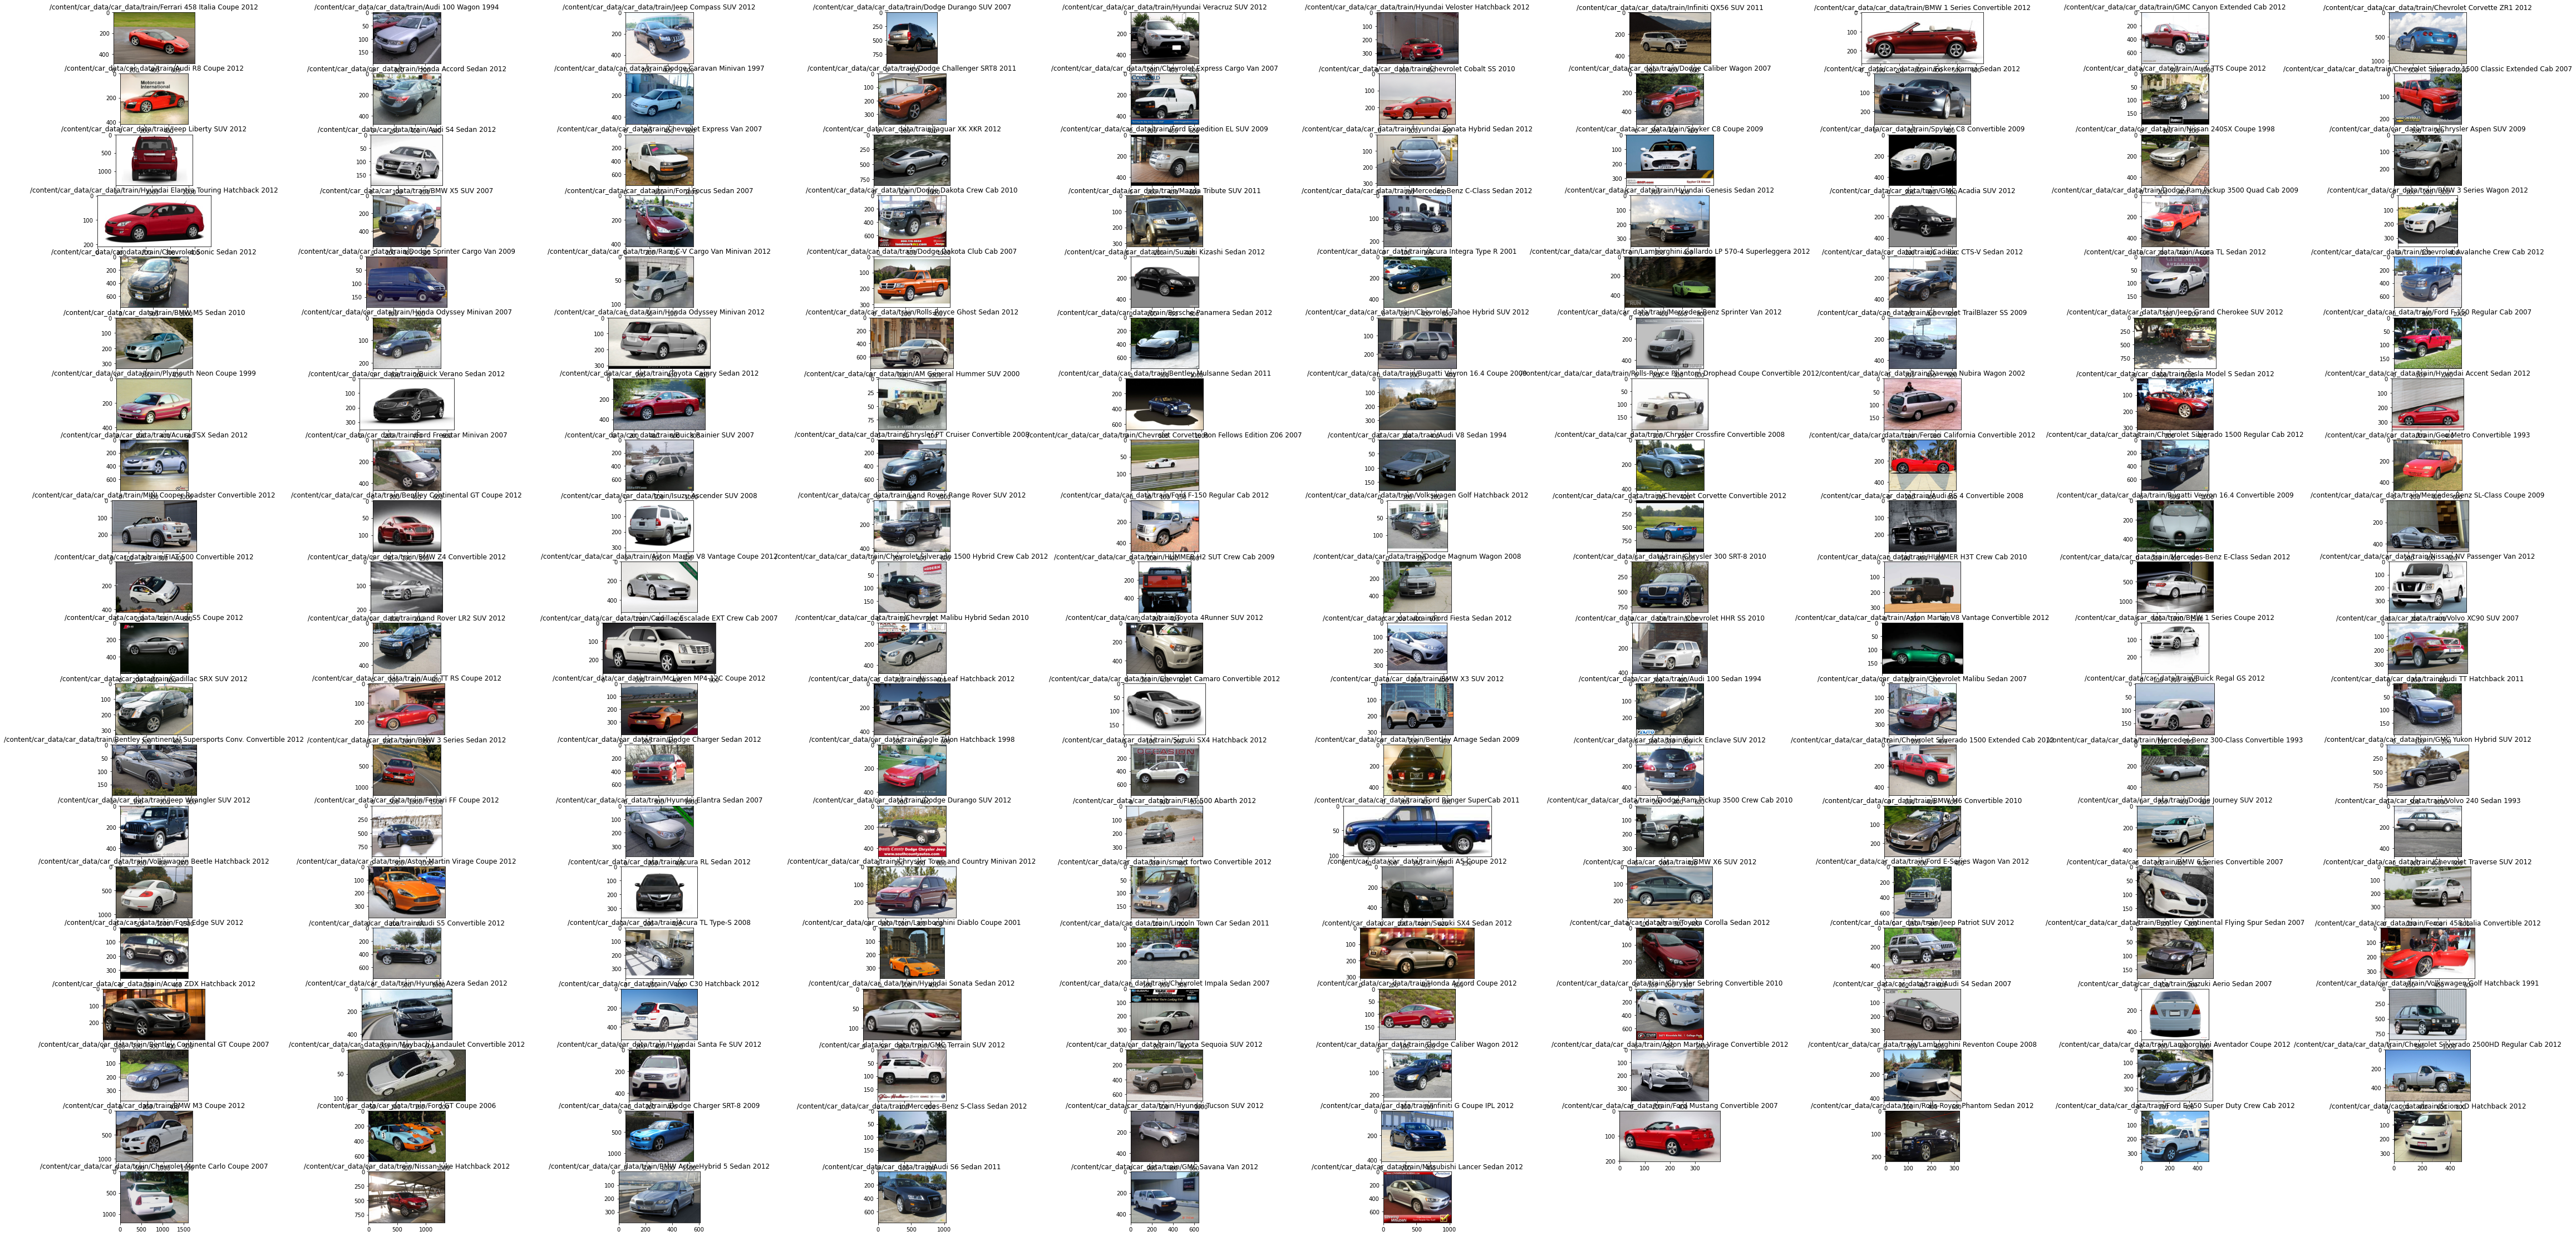

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

plt.figure(figsize= (80,40))
n = 1

for i in train_dir_named:
  img_path = os.path.join(i, os.listdir(i)[0])
  img = mpimg.imread(img_path)
  
  plt.subplot(20, 10, n)
  
  plt.imshow(img)
  plt.title(i)
  n+=1

plt.show()

# First attempt at a Simple CNN Model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Input, BatchNormalization
import pandas as pd
import seaborn as sns
from tensorflow.keras.regularizers import l2
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt




In [ ]:
model = tf.keras.models.Sequential([

Conv2D(32,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'),
MaxPooling2D(pool_size =(2,2),strides=2),
Conv2D(32,kernel_size=(3,3),activation='relu'),
MaxPooling2D(pool_size =(2,2),strides=2),
Conv2D(32,kernel_size=(3,3),activation='relu'),
MaxPooling2D(pool_size =(2,2),strides=2),
Conv2D(32,kernel_size=(3,3),activation='relu'),
MaxPooling2D(pool_size =(2,2),strides=2),
Conv2D(32,kernel_size=(3,3),activation='relu'),
MaxPooling2D(pool_size =(2,2),strides=2),
Flatten(),

Dense(units=256,activation='relu'),
Dense(units=256,activation='relu'),
Dense(units=256,activation='relu'),
Dense(units=196,activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9

In [ ]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

# Image Augmentation and Flow from Directory

In [ ]:
train_data_dir = "/content/car_data/car_data/train"
test_data_dir = "/content/car_data/car_data/test"

train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode = "nearest")
# Try 0.1
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


###Put Checkpoint Callback and early stopping here

In [ ]:
history = model.fit(train_generator, validation_data=test_generator,
                    epochs=15,
                    verbose=2)

Epoch 1/15
255/255 - 187s - loss: 5.2784 - accuracy: 0.0071 - val_loss: 5.3131 - val_accuracy: 0.0085
Epoch 2/15
255/255 - 170s - loss: 5.2625 - accuracy: 0.0091 - val_loss: 5.2066 - val_accuracy: 0.0112
Epoch 3/15
255/255 - 168s - loss: 5.1895 - accuracy: 0.0115 - val_loss: 5.1566 - val_accuracy: 0.0107
Epoch 4/15
255/255 - 168s - loss: 5.1602 - accuracy: 0.0097 - val_loss: 5.1416 - val_accuracy: 0.0119
Epoch 5/15
255/255 - 168s - loss: 5.1473 - accuracy: 0.0109 - val_loss: 5.1343 - val_accuracy: 0.0109
Epoch 6/15
255/255 - 169s - loss: 5.1388 - accuracy: 0.0115 - val_loss: 5.1404 - val_accuracy: 0.0113
Epoch 7/15
255/255 - 168s - loss: 5.1372 - accuracy: 0.0123 - val_loss: 5.1401 - val_accuracy: 0.0139
Epoch 8/15
255/255 - 167s - loss: 5.1330 - accuracy: 0.0117 - val_loss: 5.1192 - val_accuracy: 0.0132
Epoch 9/15
255/255 - 166s - loss: 5.1300 - accuracy: 0.0125 - val_loss: 5.1134 - val_accuracy: 0.0148
Epoch 10/15
255/255 - 167s - loss: 5.1186 - accuracy: 0.0139 - val_loss: 5.1135 - 

# Plotting Results

In [ ]:
vals = pd.DataFrame.from_dict(history.history)
vals = pd.concat([pd.Series(range(0,15),name='epochs'),vals],axis=1)
vals.head()

epochs      loss  accuracy  val_loss  val_accuracy
0       0  5.278364  0.007122  5.313061      0.008457
1       1  5.262492  0.009086  5.206643      0.011193
2       2  5.189487  0.011542  5.156614      0.010695
3       3  5.160164  0.009700  5.141631      0.011939
4       4  5.147313  0.010928  5.134336      0.010944

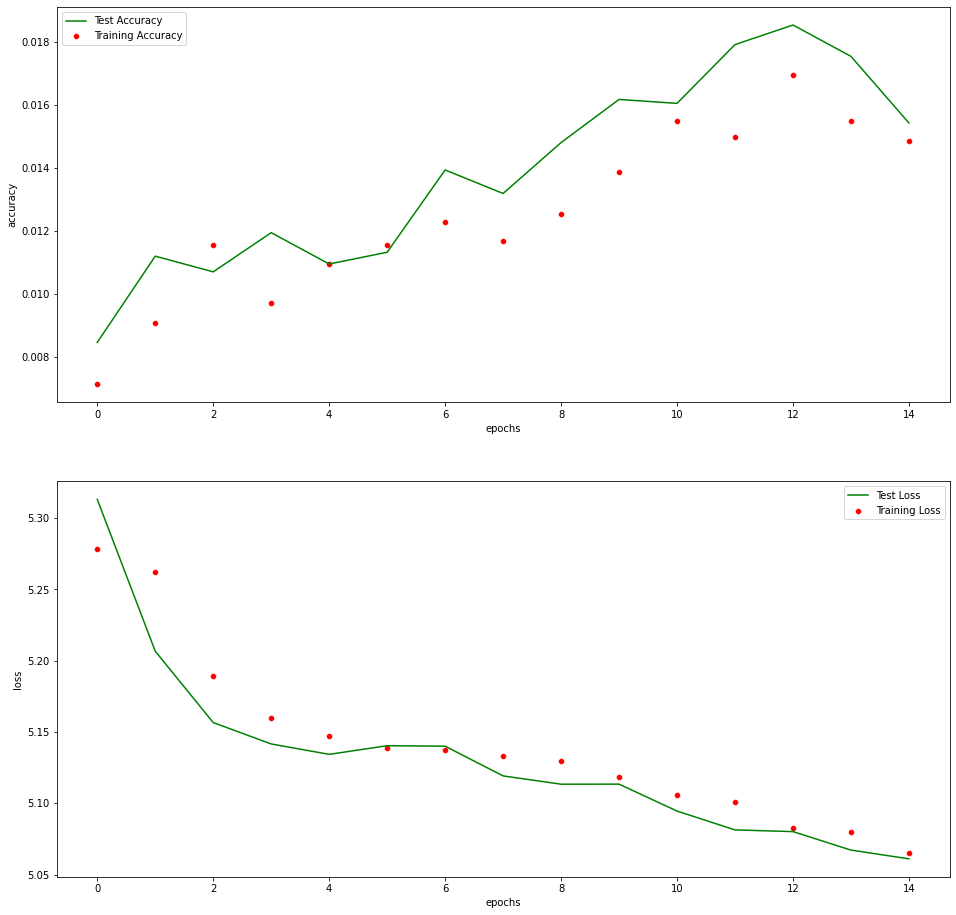

In [ ]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='accuracy',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_accuracy',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])


In [ ]:
model.evaluate(test_generator)

252/252 [==============================] - 63s 251ms/step - loss: 5.0611 - accuracy: 0.0154


[5.061092853546143, 0.01542096771299839]

# Are these results any good?!

**Loss and Accuracy** are the scores that result from the model making a guess as to the classification of the training data, and then measuring it against the known label. 

**Accuracy** is the portion of correct guesses. 

The **Validation accuracy** or in my case the **Test Accuracy** is the measurement with the data that has not been used in training. 

In short with a Test Accuracy of 0.0154 ........ No these results arent good. Not even a little. 

![](https://d3pbdxdl8c65wb.cloudfront.net/cloudinary/2019/Dec/01/4hocoLXxWr4QTTwAbrwD.jpg)



# Next lets try adding Batch Regularization, Dropout, Kernel Regularization and a Different Model Design (AlexNet). 

In [ ]:
model_Alex = tf.keras.models.Sequential([ 

Conv2D(96,kernel_size=(11,11), strides = (4,4), input_shape=(150,150,3),activation='relu', kernel_regularizer=l2(0.0005)),
MaxPooling2D(pool_size=(3,3), strides= (2,2), padding='valid'),
BatchNormalization(),

Conv2D(256,kernel_size=(5,5), strides = (1,1), padding = "same", activation='relu', kernel_regularizer=l2(0.0005)),
MaxPooling2D(pool_size=(3,3), strides= (2,2), padding='valid'),
BatchNormalization(),

Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', activation= "relu", kernel_regularizer=l2(0.0005)),
BatchNormalization(),

Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', activation = "relu", kernel_regularizer=l2(0.0005)),
BatchNormalization(),

Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation = "relu", kernel_regularizer=l2(0.0005)),
MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
BatchNormalization(),

Flatten(),

Dense(4096, activation = 'relu'),
Dropout(0.5),

Dense(4096, activation = 'relu'),
Dropout(0.5),

Dense(196, activation = 'softmax')])



In [ ]:
model_Alex.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 35, 35, 96)        34944     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 17, 17, 96)        0         
_________________________________________________________________
batch_normalization_114 (Bat (None, 17, 17, 96)        384       
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 17, 17, 256)       614656    
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_115 (Bat (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 8, 8, 384)       

In [ ]:
# reduce learning rate by 0.1 when the validation error plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1))
 
# set the SGD optimizer with lr of 0.01 and momentum of 0.9
optimizer = SGD(lr = 0.01, momentum = 0.9)
 

model_Alex.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Image Augmentation and Flow from Directory

In [ ]:
train_data_dir = "/content/car_data/car_data/train"
test_data_dir = "/content/car_data/car_data/test" 

train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [ ]:
history_Alex = model_Alex.fit(train_generator, validation_data=test_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
255/255 - 168s - loss: 6.1975 - accuracy: 0.0070 - val_loss: 5.8998 - val_accuracy: 0.0078
Epoch 2/10
255/255 - 167s - loss: 5.9130 - accuracy: 0.0081 - val_loss: 5.7999 - val_accuracy: 0.0108
Epoch 3/10
255/255 - 166s - loss: 5.8353 - accuracy: 0.0107 - val_loss: 5.7293 - val_accuracy: 0.0149
Epoch 4/10
255/255 - 166s - loss: 5.7721 - accuracy: 0.0126 - val_loss: 5.6913 - val_accuracy: 0.0167
Epoch 5/10
255/255 - 168s - loss: 5.7256 - accuracy: 0.0151 - val_loss: 5.6462 - val_accuracy: 0.0203
Epoch 6/10
255/255 - 167s - loss: 5.6765 - accuracy: 0.0162 - val_loss: 5.5930 - val_accuracy: 0.0174
Epoch 7/10
255/255 - 165s - loss: 5.6362 - accuracy: 0.0179 - val_loss: 5.5565 - val_accuracy: 0.0234
Epoch 8/10
255/255 - 164s - loss: 5.5836 - accuracy: 0.0205 - val_loss: 5.5070 - val_accuracy: 0.0230
Epoch 9/10
255/255 - 168s - loss: 5.5407 - accuracy: 0.0228 - val_loss: 5.4639 - val_accuracy: 0.0241
Epoch 10/10
255/255 - 169s - loss: 5.5095 - accuracy: 0.0192 - val_loss: 5.4376 - 

In [ ]:
vals = pd.DataFrame.from_dict(history.history)
vals = pd.concat([pd.Series(range(0,15),name='epochs'),vals],axis=1)
vals.head()

epochs      loss  accuracy  val_loss  val_accuracy
0       0  6.197538  0.006999  5.899796      0.007835
1       1  5.912994  0.008104  5.799878      0.010820
2       2  5.835324  0.010683  5.729349      0.014924
3       3  5.772099  0.012647  5.691347      0.016665
4       4  5.725618  0.015103  5.646159      0.020271

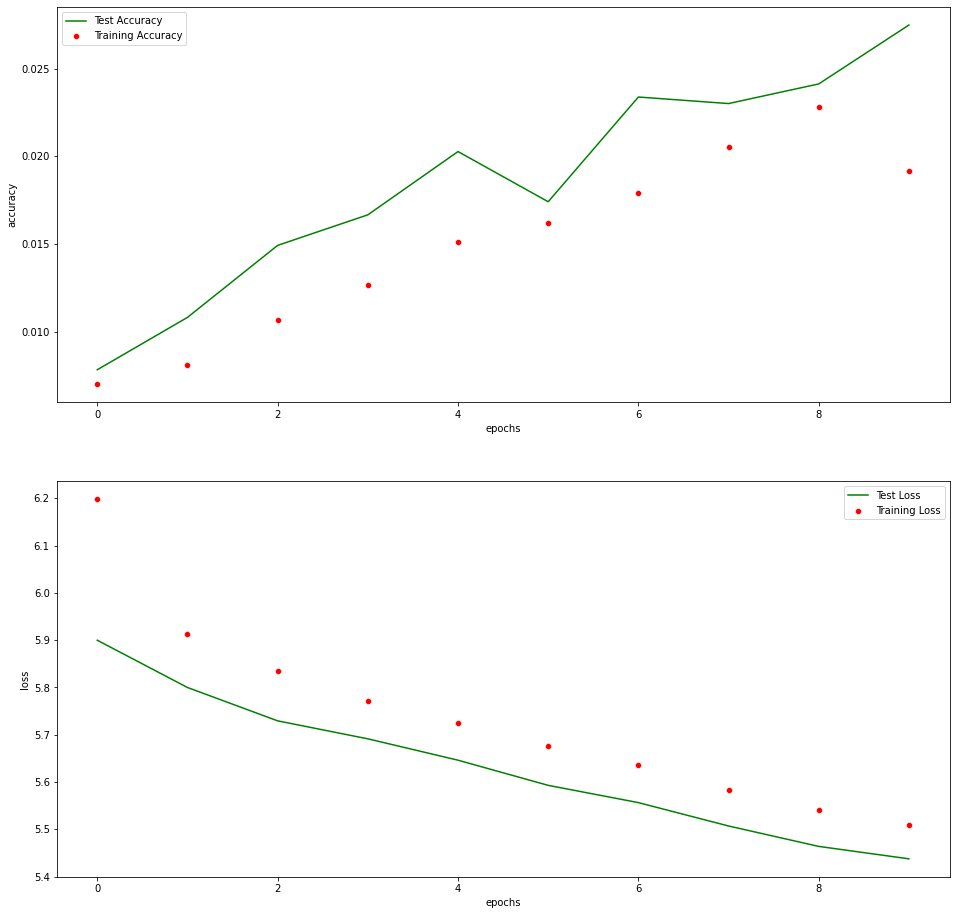

In [ ]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='accuracy',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_accuracy',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
model_Alex.evaluate(test_generator)

252/252 [==============================] - 65s 260ms/step - loss: 5.4376 - accuracy: 0.0275


[5.437600612640381, 0.027484143152832985]

# AlexNet went slightly better but still HORRIBLE.

![](https://www.parksideadvisors.com/wp-content/uploads/2017/08/iStock-184941527.jpg)

# In desperation I turned to Dense Net201....

![](https://i.imgur.com/4mtAHdI.png)



In [ ]:
train_data_dir = "/content/car_data/car_data/train"
test_data_dir = "/content/car_data/car_data/test" 

train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


# Importing DenseNet201 Via Keras Applications

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(244,244,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(196, activation='softmax')(x3)
model_den = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model_den.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 244, 244, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 250, 250, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 122, 122, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 122, 122, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model_den.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_den=model_den.fit(train_generator, validation_data=test_generator,
                    epochs=30,
                    verbose=2)

Epoch 1/30
255/255 - 160s - loss: 5.2019 - accuracy: 0.0122 - val_loss: 4.8973 - val_accuracy: 0.0255
Epoch 2/30
255/255 - 146s - loss: 4.7018 - accuracy: 0.0435 - val_loss: 4.3144 - val_accuracy: 0.0684
Epoch 3/30
255/255 - 145s - loss: 4.3195 - accuracy: 0.0801 - val_loss: 4.0132 - val_accuracy: 0.1025
Epoch 4/30
255/255 - 145s - loss: 4.0452 - accuracy: 0.1071 - val_loss: 3.8234 - val_accuracy: 0.1239
Epoch 5/30
255/255 - 146s - loss: 3.8555 - accuracy: 0.1326 - val_loss: 3.7203 - val_accuracy: 0.1310
Epoch 6/30
255/255 - 146s - loss: 3.7211 - accuracy: 0.1545 - val_loss: 3.5680 - val_accuracy: 0.1648
Epoch 7/30
255/255 - 147s - loss: 3.6208 - accuracy: 0.1663 - val_loss: 3.4614 - val_accuracy: 0.1828
Epoch 8/30
255/255 - 145s - loss: 3.5218 - accuracy: 0.1847 - val_loss: 3.4665 - val_accuracy: 0.1766
Epoch 9/30
255/255 - 145s - loss: 3.4640 - accuracy: 0.1947 - val_loss: 3.4114 - val_accuracy: 0.1885
Epoch 10/30
255/255 - 145s - loss: 3.3933 - accuracy: 0.2026 - val_loss: 3.3610 - 

In [ ]:
vals = pd.DataFrame.from_dict(history_den.history)
vals = pd.concat([pd.Series(range(0,15),name='epochs'),vals],axis=1)
vals.head()

epochs      loss  accuracy  val_loss  val_accuracy
0     0.0  5.201853  0.012156  4.897305      0.025494
1     1.0  4.701756  0.043468  4.314404      0.068399
2     2.0  4.319515  0.080059  4.013175      0.102475
3     3.0  4.045186  0.107073  3.823395      0.123865
4     4.0  3.855514  0.132613  3.720330      0.130954

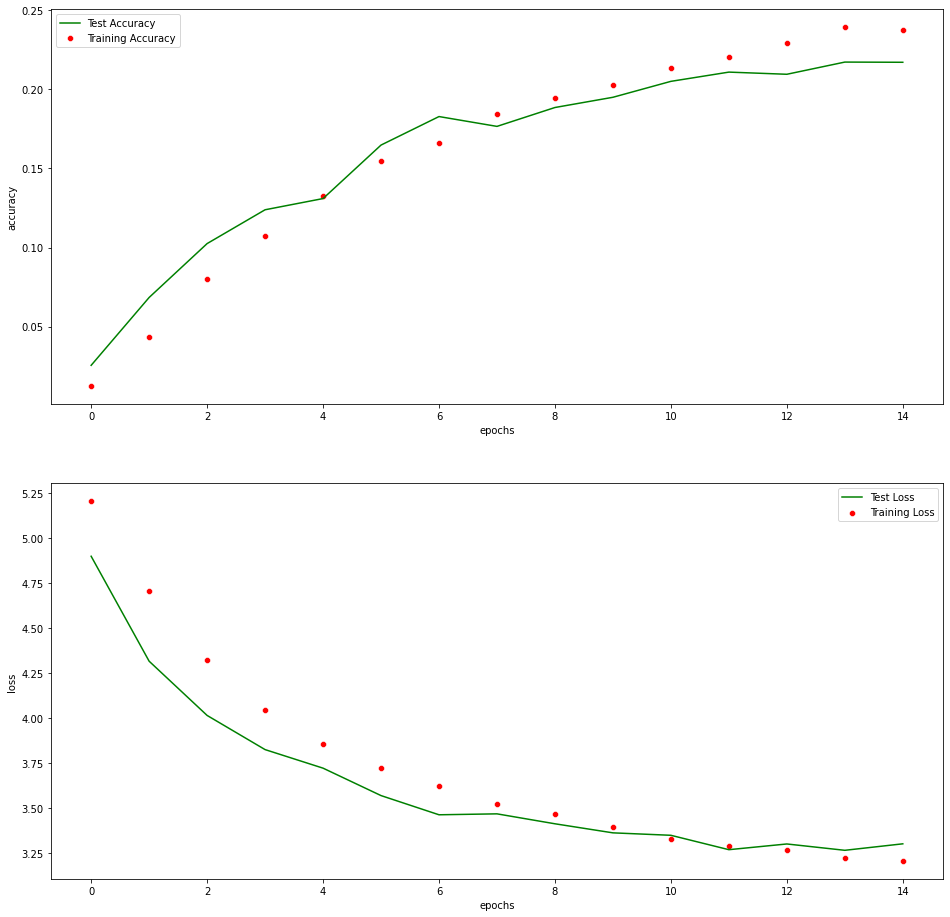

In [ ]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='accuracy',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_accuracy',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
model_den.evaluate(test_generator)

252/252 [==============================] - 59s 235ms/step - loss: 3.0978 - accuracy: 0.2593


[3.097813844680786, 0.25929611921310425]

# DenseNET 201 drastically improved my results to around 26% accuracy on my test_set.

#Still way way off but headed in the right direction I guess!

# Final Attempt with MobileNET

In [ ]:
train_data_dir = "/content/car_data/car_data/train"
test_data_dir = "/content/car_data/car_data/test" 

train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


# Pretrained Mobile Net

In [ ]:
pretrained_model4 = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet',pooling='avg', alpha = 0.5)
pretrained_model4.trainable = False

In [ ]:
inputs4 = pretrained_model4.input
x4 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model4.output)
outputs4 = tf.keras.layers.Dense(196, activation='softmax')(x4)
model_mobile = tf.keras.Model(inputs=inputs4, outputs=outputs4)

In [ ]:
model_mobile.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 16) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
model_mobile.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_mobile=model_mobile.fit(train_generator, validation_data=test_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
255/255 - 166s - loss: 5.2455 - accuracy: 0.0103 - val_loss: 5.0750 - val_accuracy: 0.0261
Epoch 2/10
255/255 - 160s - loss: 4.9259 - accuracy: 0.0328 - val_loss: 4.6991 - val_accuracy: 0.0492
Epoch 3/10
255/255 - 159s - loss: 4.5995 - accuracy: 0.0572 - val_loss: 4.4005 - val_accuracy: 0.0729
Epoch 4/10
255/255 - 159s - loss: 4.3695 - accuracy: 0.0829 - val_loss: 4.2468 - val_accuracy: 0.0907
Epoch 5/10
255/255 - 158s - loss: 4.2190 - accuracy: 0.1004 - val_loss: 4.1215 - val_accuracy: 0.1030
Epoch 6/10
255/255 - 157s - loss: 4.1406 - accuracy: 0.1127 - val_loss: 4.0211 - val_accuracy: 0.1189
Epoch 7/10
255/255 - 157s - loss: 4.0361 - accuracy: 0.1219 - val_loss: 4.0602 - val_accuracy: 0.1118
Epoch 8/10
255/255 - 158s - loss: 3.9747 - accuracy: 0.1287 - val_loss: 3.9580 - val_accuracy: 0.1245
Epoch 9/10
255/255 - 157s - loss: 3.8943 - accuracy: 0.1519 - val_loss: 3.9430 - val_accuracy: 0.1305
Epoch 10/10
255/255 - 157s - loss: 3.8677 - accuracy: 0.1469 - val_loss: 3.9345 - 

### Could have let MobileNet run for a little while longer but it didn't seem to be performing any better than DenseNet so I left it after 10 Epochs

# Proper Pretrained MobileNet From Lab

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import preprocess_input #### Need to search for specific input per model

train_data_dir = "/content/car_data/car_data/train"
test_data_dir = "/content/car_data/car_data/test"

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
    #preprocessing_function=preprocess_input) ### replace /1.255))

test_datagen = ImageDataGenerator()

train_generator = datagen.flow_from_directory(
                      train_data_dir,
                      target_size=(224, 224), # check required input shape (MobileNet)
                      batch_size=32,
                      class_mode='categorical')

val_generator = test_datagen.flow_from_directory(
                      test_data_dir,
                      target_size=(224, 224), # check required input shape
                      batch_size=32,
                      class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [ ]:
base_model_net = keras.applications.MobileNetV2(
                          weights="imagenet",
                          input_shape=(224, 224, 3), 
                          include_top=False)

# Freeze the base model
base_model_net.trainable=False

inputs = keras.Input(shape=(224, 224, 3))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model_net(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(196, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
________________________________________________________________

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
255/255 [==============================] - 199s 712ms/step - loss: 5.3990 - accuracy: 0.0261 - val_loss: 4.0060 - val_accuracy: 0.1328
Epoch 2/20
255/255 [==============================] - 181s 710ms/step - loss: 3.8865 - accuracy: 0.1644 - val_loss: 3.5530 - val_accuracy: 0.2008
Epoch 3/20
255/255 [==============================] - 181s 710ms/step - loss: 3.3522 - accuracy: 0.2391 - val_loss: 3.3331 - val_accuracy: 0.2333
Epoch 4/20
255/255 [==============================] - 181s 709ms/step - loss: 3.0206 - accuracy: 0.3016 - val_loss: 3.1800 - val_accuracy: 0.2609
Epoch 5/20
255/255 [==============================] - 181s 709ms/step - loss: 2.8321 - accuracy: 0.3300 - val_loss: 3.0321 - val_accuracy: 0.2833
Epoch 6/20
255/255 [==============================] - 181s 710ms/step - loss: 2.5756 - accuracy: 0.3932 - val_loss: 2.9710 - val_accuracy: 0.3011
Epoch 7/20
255/255 [==============================] - 180s 708ms/step - loss: 2.5140 - accuracy: 0.4051 - val_loss: 2.9458 -

# Score Before Fine Tuning

In [ ]:
model.evaluate(val_generator)

252/252 [==============================] - 60s 237ms/step - loss: 2.6797 - accuracy: 0.3522


[2.6797056198120117, 0.35219499468803406]

In [ ]:
## This is how to implement fine-tuning of the whole base model:

# Unfreeze the base model
base_model_net.trainable = True

fine_tune_at = 70

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_net.layers[:fine_tune_at]:
  layer.trainable =  False

model.summary()
print("Number of layers in the base model: ", len(base_model_net.layers))
 
# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
# Train end-to-end. Be careful to stop before you overfit!


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 196)               251076

In [ ]:
fine_tune_epochs = 10
total_epochs = 20 + fine_tune_epochs

history_fine = model.fit(train_generator, 
                         steps_per_epoch=63,
                         validation_data=val_generator,
                         validation_steps=32,
                         epochs=total_epochs,
                         initial_epoch=20)

Epoch 21/30
63/63 [==============================] - 42s 624ms/step - loss: 1.6079 - accuracy: 0.5954 - val_loss: 2.5732 - val_accuracy: 0.3906
Epoch 22/30
63/63 [==============================] - 38s 609ms/step - loss: 1.5189 - accuracy: 0.5975 - val_loss: 2.4425 - val_accuracy: 0.3936
Epoch 23/30
63/63 [==============================] - 40s 640ms/step - loss: 1.3232 - accuracy: 0.6545 - val_loss: 2.4755 - val_accuracy: 0.4033
Epoch 24/30
63/63 [==============================] - 40s 638ms/step - loss: 1.3805 - accuracy: 0.6460 - val_loss: 2.3051 - val_accuracy: 0.4287
Epoch 25/30
63/63 [==============================] - 40s 633ms/step - loss: 1.2926 - accuracy: 0.6623 - val_loss: 2.3761 - val_accuracy: 0.4287
Epoch 26/30
63/63 [==============================] - 38s 603ms/step - loss: 1.3009 - accuracy: 0.6466 - val_loss: 2.3275 - val_accuracy: 0.4248
Epoch 27/30
63/63 [==============================] - 38s 598ms/step - loss: 1.2625 - accuracy: 0.6671 - val_loss: 2.3781 - val_accuracy:

# Score after Fine Tuning

In [ ]:
model.evaluate(val_generator)

252/252 [==============================] - 59s 236ms/step - loss: 2.2685 - accuracy: 0.4481


[2.268505811691284, 0.44807860255241394]

# Plot Results

In [ ]:
import pandas as pd
import seaborn as sns

vals = pd.DataFrame.from_dict(history_fine.history)
vals = pd.concat([pd.Series(range(0,15),name='epochs'),vals],axis=1)
vals.head()

epochs      loss  accuracy  val_loss  val_accuracy
0       0  1.598362  0.593500  2.573177      0.390625
1       1  1.467600  0.617063  2.442516      0.393555
2       2  1.338309  0.652282  2.475482      0.403320
3       3  1.342123  0.650500  2.305119      0.428711
4       4  1.305695  0.655754  2.376137      0.428711

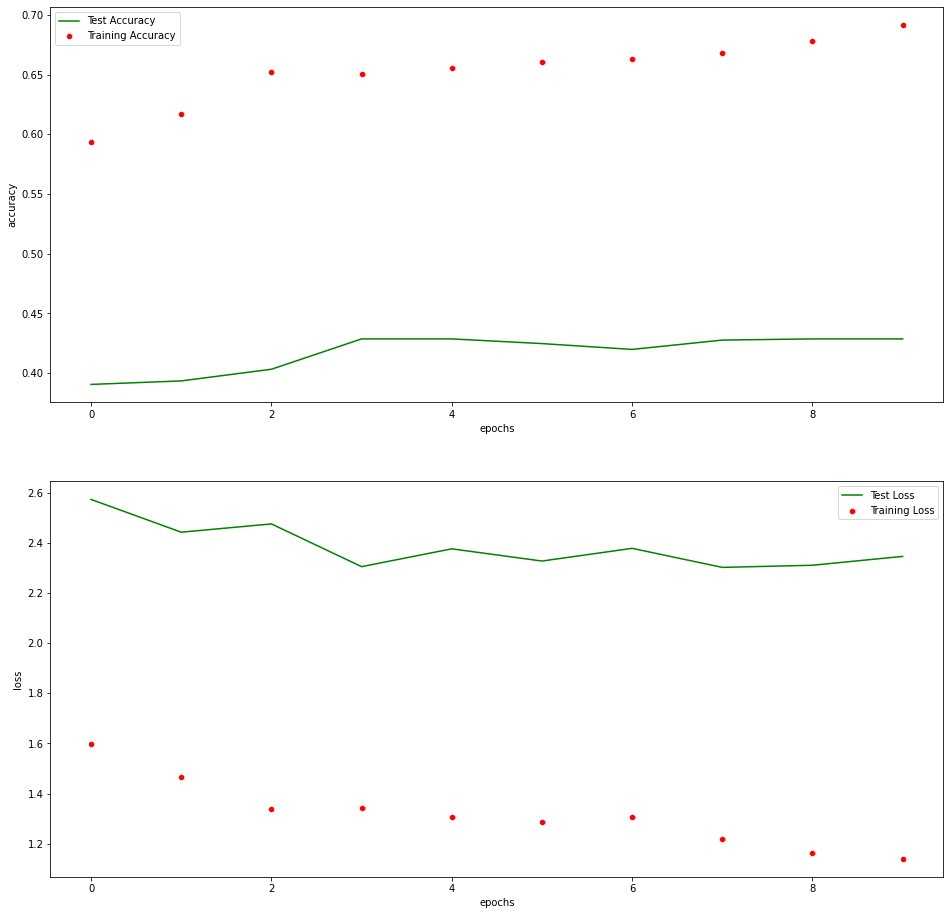

In [ ]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='accuracy',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_accuracy',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

# Let's give it a try!

In [ ]:
class_names

['Ferrari 458 Italia Coupe 2012',
 'Audi 100 Wagon 1994',
 'Jeep Compass SUV 2012',
 'Dodge Durango SUV 2007',
 'Hyundai Veracruz SUV 2012',
 'Hyundai Veloster Hatchback 2012',
 'Infiniti QX56 SUV 2011',
 'BMW 1 Series Convertible 2012',
 'GMC Canyon Extended Cab 2012',
 'Chevrolet Corvette ZR1 2012',
 'Audi R8 Coupe 2012',
 'Honda Accord Sedan 2012',
 'Dodge Caravan Minivan 1997',
 'Dodge Challenger SRT8 2011',
 'Chevrolet Express Cargo Van 2007',
 'Chevrolet Cobalt SS 2010',
 'Dodge Caliber Wagon 2007',
 'Fisker Karma Sedan 2012',
 'Audi TTS Coupe 2012',
 'Chevrolet Silverado 1500 Classic Extended Cab 2007',
 'Jeep Liberty SUV 2012',
 'Audi S4 Sedan 2012',
 'Chevrolet Express Van 2007',
 'Jaguar XK XKR 2012',
 'Ford Expedition EL SUV 2009',
 'Hyundai Sonata Hybrid Sedan 2012',
 'Spyker C8 Coupe 2009',
 'Spyker C8 Convertible 2009',
 'Nissan 240SX Coupe 1998',
 'Chrysler Aspen SUV 2009',
 'Hyundai Elantra Touring Hatchback 2012',
 'BMW X5 SUV 2007',
 'Ford Focus Sedan 2007',
 'Dodge D

Saving 2012-Ferrari-458-Italia-Coupe-031-800.jpg to 2012-Ferrari-458-Italia-Coupe-031-800 (4).jpg
Dodge Challenger SRT8 2011


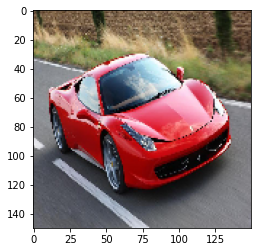

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  
  classes = model.predict(x, batch_size=10)
  
  print(class_names[classes.argmax()])
  
  plt.imshow(img)

  ### Think I should have normalized the image to get a better result (.astypefloat)
 
 

### This is what a Dodge Challenger SRT8 2011 actually looks like:

![](https://www.motortrend.com/uploads/sites/5/2010/11/2011-dodge-challenger-RT-side-motion.jpg)

# Add Confusion Matrix

# **Lessons Learnt**

# **WHY COULD MY TRAINING ACCURACY BE LOWER THAN MY VALIDATION (TEST) ACCURACY?**

## Heavy dropout or other similar regularization technique   might answer this. Due to disabling neurons, some of the information about each sample is lost, and the subsequent layers attempt to construct predictions basing on incomplete representations. 

## As such I may have made it artificially harder for the network to give the right answers. However, during validation all of the units are available, so the network has its full computational power - and thus it might perform better than in training.

# **Is it a decent result given the size of the dataset ? Are you happy with the result?**

## Not really no! Very disappointed with the scores which my model produced. I feel like a learned a lot and produced a project which was easy enough to follow and understand but I just couldnt get the results to match some of the other participants in the Kaggle competition. 

# **What can be improved if I got more time?**

## *   Find More Data
##*   Narrow Down Classes
##*   CREATE A CHECKPOINT CALLBACK!
##*   Create samples from Training set and Test set in order to run my models more effectively
##* More attention paid to preprosessing (Image Cropping?)
## * Use of Fast Ai?




